In [4]:
pip install torchvision

   ---------------------------------------- 0.0/3.7 MB ? eta -:--:--
   ---------------------- ----------------- 2.1/3.7 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 3.7/3.7 MB 11.0 MB/s  0:00:00
   ---------------------------------------- 0.0/111.0 MB ? eta -:--:--
   - -------------------------------------- 3.4/111.0 MB 16.7 MB/s eta 0:00:07
   -- ------------------------------------- 6.8/111.0 MB 16.1 MB/s eta 0:00:07
   --- ------------------------------------ 10.2/111.0 MB 16.3 MB/s eta 0:00:07
   ----- ---------------------------------- 13.9/111.0 MB 16.4 MB/s eta 0:00:06
   ------ --------------------------------- 17.3/111.0 MB 16.5 MB/s eta 0:00:06
   ------- -------------------------------- 20.7/111.0 MB 16.4 MB/s eta 0:00:06
   -------- ------------------------------- 24.1/111.0 MB 16.2 MB/s eta 0:00:06
   ---------- ----------------------------- 27.8/111.0 MB 16.3 MB/s eta 0:00:06
   ----------- ---------------------------- 30.7/111.0 MB 16.1 MB/s eta

  You can safely remove it manually.



   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2

In [5]:
import scipy
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier       # Used in 2D data problems
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
import sklearn.tree as tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LinearRegression 

import jupyter

In [6]:
import sys
import os

In [7]:
import scipy.io

In [9]:
def load_svhn_data(split='train'):
    """
    Loads SVHN cropped digit data from .mat files.
    
    Args:
        data_dir (str): Path to the folder containing .mat files.
        split (str): 'train' or 'test'.
        
    Returns:
        X (np.array): Images of shape (N, 32, 32, 3) -> Normalized [0, 1]
        y (np.array): Labels of shape (N,) -> Corrected so '0' is class 0 (not 10)
    """
    file_path = os.path.join(f'{split}_32x32.mat')
    
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}. Please download it from http://ufldl.stanford.edu/housenumbers/")

    print(f"Loading {split} data from {file_path}...")
    mat_data = scipy.io.loadmat(file_path)
    
    # The .mat file has X shape: (32, 32, 3, N) -> (Height, Width, Channels, Batch)
    # We want standard shape: (N, 32, 32, 3) for visualization/processing
    X = mat_data['X']
    X = np.transpose(X, (3, 0, 1, 2))
    
    # Normalize pixel values to [0, 1] range (Standard for Deep Learning)
    X = X.astype('float32') / 255.0

    # The .mat file has y shape: (N, 1). Flatten it to (N,)
    y = mat_data['y'].flatten()
    
    # FIX LABELS: SVHN labels '0' as 10. We need to map 10 -> 0.
    y[y == 10] = 0
    
    print(f"Loaded {X.shape[0]} samples.")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    
    return X, y

In [10]:
X_train, y_train = load_svhn_data()

Loading train data from train_32x32.mat...
Loaded 73257 samples.
X shape: (73257, 32, 32, 3)
y shape: (73257,)


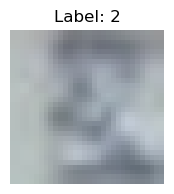

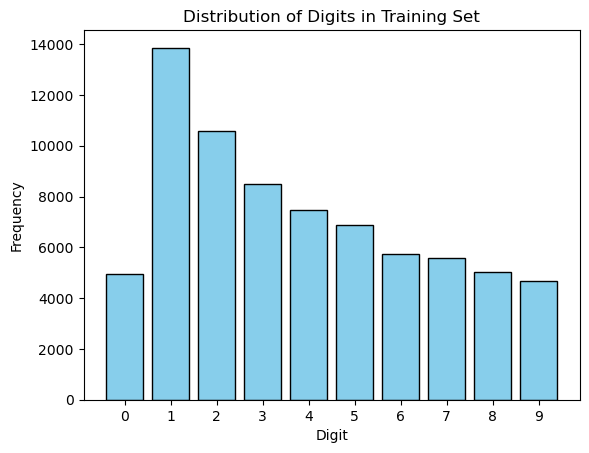

In [18]:
# 2. Visualize a random sample
index = 100  # Change this number to see different images
plt.figure(figsize=(2,2))
plt.imshow(X_train[index])
plt.title(f"Label: {y_train[index]}")
plt.axis('off')
plt.show()

# 3. Check Class Balance (First step of Analysis)
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(10))
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()

In [19]:
seed = 1234
np.random.seed(seed)

In [21]:
X_flat = X_train.reshape(X_train.shape[0], -1)

In [30]:
learner = LogisticRegression(random_state = seed, C = 0.01, max_iter = 100)
learner.fit(X_flat, y_train)

C:\Users\mathw\miniconda3\envs\cs178\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1234
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
X_pred = learner.predict(X_flat)
print(np.mean(X_pred != y_train))

0.7276028229384223


In [53]:
network = MLPClassifier(hidden_layer_sizes = (64, 64), solver = 'sgd', batch_size = 256, random_state = seed)

In [50]:
X_flat.shape

(73257, 3072)

In [54]:
network.fit(X_flat, y_train)

C:\Users\mathw\miniconda3\envs\cs178\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'sgd'
,alpha,0.0001
,batch_size,256
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,1234


In [55]:
pre = network.predict(X_flat)
print(np.mean(pre != y_train))

0.21461430307001378


In [43]:
from sklearn.metrics import f1_score

In [56]:
f1_score(y_train, pre, average='macro')

0.7797497199256511

In [58]:
m, n = X_flat.shape
m, n

(73257, 3072)

In [60]:
# random forest
trees = []

# learn 50 different decision trees, by taking random indices
for i in range(50):
    indices = (n * np.random.rand(n)).astype(int)
    Xb, Yb = X_flat[indices], y_train[indices]

    # certain parameters to allow complex trees
    dec_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 100, min_samples_leaf = 2, random_state = seed, max_features = 1000)
    dec_tree.fit(Xb, Yb)
    trees.append(dec_tree)

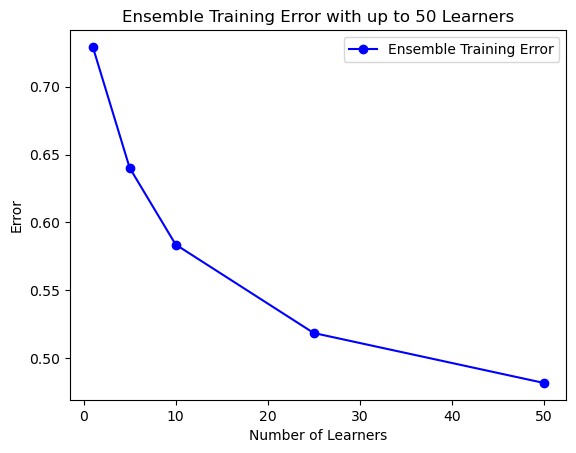

In [69]:
B = [1, 5, 10, 25, 50]
train_errs = []
valid_errs = []

fifty = []
for i in B:
    # just predict from the first i models
    predict_train = np.zeros((m, i))
    for j in range(i):
        predict_train[:,j] = trees[j].predict(X_flat)

    # if the prediction is exactly zero we prefer +1
    modes = []
    for n in predict_train:
        arr = np.array(n)
        values, counts = np.unique(arr, return_counts=True)
        most_common = values[np.argmax(counts)]
        modes.append(most_common)
        if i == 50:
            fifty.append(most_common)
        
    #pre_train_results = (np.mean(predict_train, axis = 1) >= 0).astype(int) * 2 - 1
     #   pre_valid_results = (np.mean(predict_valid, axis = 1) >= 0).astype(int) * 2 - 1

    # get errors
    pre_train_error = np.mean(modes != y_train)
    #pre_valid_error = np.mean(pre_valid_results != Yva)
    train_errs.append(pre_train_error)
    #valid_errs.append(pre_valid_error)

plt.plot(B, train_errs, 'o-', color = 'b', label = 'Ensemble Training Error')
plt.xlabel("Number of Learners")
plt.ylabel("Error")
plt.title("Ensemble Training Error with up to 50 Learners")
plt.legend()

In [70]:
float(train_errs[4])

0.4819198165363037

In [71]:
f1_score(y_train, fifty, average='macro')

0.46761874691583455